In [136]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("C:\\Users\\user\\Desktop\\machine\\data_1017.xlsx",sheet_name="Sheet1")
label_encoder = LabelEncoder()

df = df.drop(['fixed_type','ht_omr_data'], axis=1)

In [52]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# df = pd.read_excel("C:\\Users\\user\\Desktop\\machine\\data_1015.xlsx",sheet_name="Sheet1")
# label_encoder = LabelEncoder()

# # df = df.drop(['fixed_type','ht_omr_data'], axis=1)

In [ ]:
# def split_omr_data(df):
#     # 'ht_omr_data' 열의 값을 리스트로 변환 (한 글자씩)
#     omr_responses = df['ht_omr_data'].apply(lambda x: list(x[:375]))  # 480개의 문항까지만 자름
#     # 리스트를 각각의 문항으로 나누어 새로운 컬럼으로 변환
#     omr_df = pd.DataFrame(omr_responses.tolist(), columns=[f'Q{i+1}' for i in range(375)])
#     # 원래 df와 결합
#     df = pd.concat([df, omr_df], axis=1)
#     return df

# # 데이터 분리 실행
# df_split = split_omr_data(df)


# df = df_split

In [129]:
df.columns

Index(['sex', 'sc_code', 'age', 'FG', 't1', 't2', 't3', 't4', 't5', 't6', 't7',
       't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17',
       't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27'],
      dtype='object')

In [55]:
# df = df.drop(['fixed_type','ht_omr_data'], axis=1)

In [4]:
# df = df[['sex', 'sc_code', 'age','t1', 't2', 't3', 't4', 't5', 't6', 't7',
#        't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17',
#        't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27','FG']]

In [130]:
df

,sex,sc_code,age,FG,t1,t2,t3,t4,t5,t6,...,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27
0,1,3,32,0,48,55,57,54,46,59,...,68,44,62,37,49,53,51,46,39,61
1,1,1,39,0,61,56,61,60,50,57,...,26,42,41,30,39,43,54,44,57,41
2,1,4,39,0,46,36,51,52,46,52,...,44,43,55,47,44,44,48,45,43,65
3,2,3,34,0,46,54,46,61,48,59,...,34,44,41,36,46,44,40,46,41,57
4,1,2,34,0,37,39,46,50,44,57,...,61,42,45,46,42,43,42,44,41,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,1,3,39,0,44,51,51,56,58,57,...,57,43,41,41,44,51,53,45,58,53
30867,1,1,29,0,43,53,43,49,43,46,...,66,52,80,60,55,60,45,57,47,38
30868,2,1,38,0,45,35,53,42,44,45,...,57,51,47,64,52,43,41,43,40,39
30869,2,1,18,0,43,51,50,44,51,52,...,54,45,41,40,50,42,50,46,42,45


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [132]:
# df = df.astype('Int32')

In [138]:
df.isnull().sum()

sex        0
sc_code    0
age        0
FG         0
t1         0
t2         0
t3         0
t4         0
t5         0
t6         0
t7         0
t8         0
t9         0
t10        0
t11        0
t12        0
t13        0
t14        0
t15        0
t16        0
t17        0
t18        0
t19        0
t20        0
t21        0
t22        0
t23        0
t24        0
t25        0
t26        0
t27        0
dtype: int64

In [139]:
X = df.drop(columns=['FG'])

y = df['FG']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, stratify=y)

In [140]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter
import xgboost as xgb


# SMOTE 적용
smote = SMOTE(random_state=1000)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# X_resampled을 다시 Pandas DataFrame으로 변환하여 열 이름 설정
X_resampled = pd.DataFrame(X_resampled, columns=x_train.columns)

In [204]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [244]:
params = {
    "max_depth": 3,
    "eta": 0.001,
    "objective": "binary:logistic", 
    "eval_metric": "auc",
    "subsample": 0.6,
    "colsample_bytree": 0.8,
    "gamma": 16,
    "lambda":6,
    "alpha":6,
    "scale_pos_weight": (len(y_train[y_train == 0]) / len(y_train[y_train == 1]))*500  # 클래스 비율에 따라 가중치 설정
}


num_rounds = 2500  # 부스팅 반복 횟수 증가

# evals 파라미터에 train, test 셋을 명기하면 평가를 진행하면서 조기 중단을 적용 할 수 있다.
wlist = [(dtrain, "train"), (dtest, "eval")]
# xgb.cv(params=params, dtrain=dtrain, num_boost_round=500, nfold=5, 
#                     early_stopping_rounds=10, metrics="error", as_pandas=True)


In [245]:
# 모델 학습
xgb_model = xgb.train(
    params=params, 
    dtrain=dtrain, 
    num_boost_round=num_rounds, 
    evals=wlist, 
    early_stopping_rounds=10  # 성능 향상이 없으면 50 라운드 후 조기 중단
)

# 최적 모델 저장
xgb_model.save_model('C:\\Users\\user\\Desktop\\best_xgb_binary_model.json')  # 모델을 파일로 저장


[0]	train-auc:0.88088	eval-auc:0.89120
[1]	train-auc:0.95389	eval-auc:0.95707
[2]	train-auc:0.94937	eval-auc:0.95424
[3]	train-auc:0.94471	eval-auc:0.95179
[4]	train-auc:0.95155	eval-auc:0.95739
[5]	train-auc:0.95866	eval-auc:0.96411
[6]	train-auc:0.96782	eval-auc:0.97263
[7]	train-auc:0.97466	eval-auc:0.97874
[8]	train-auc:0.97550	eval-auc:0.97915
[9]	train-auc:0.97671	eval-auc:0.98070
[10]	train-auc:0.97764	eval-auc:0.98166
[11]	train-auc:0.97618	eval-auc:0.98043
[12]	train-auc:0.97420	eval-auc:0.97809
[13]	train-auc:0.97280	eval-auc:0.97682
[14]	train-auc:0.97106	eval-auc:0.97547
[15]	train-auc:0.97154	eval-auc:0.97563
[16]	train-auc:0.97219	eval-auc:0.97601
[17]	train-auc:0.97261	eval-auc:0.97619
[18]	train-auc:0.97259	eval-auc:0.97613
[19]	train-auc:0.97683	eval-auc:0.97980
[20]	train-auc:0.97712	eval-auc:0.97987


In [246]:
loaded_model = xgb.Booster()
loaded_model.load_model('C:\\Users\\user\\Desktop\\best_xgb_binary_model.json')

Accuracy: 0.9337651821862348


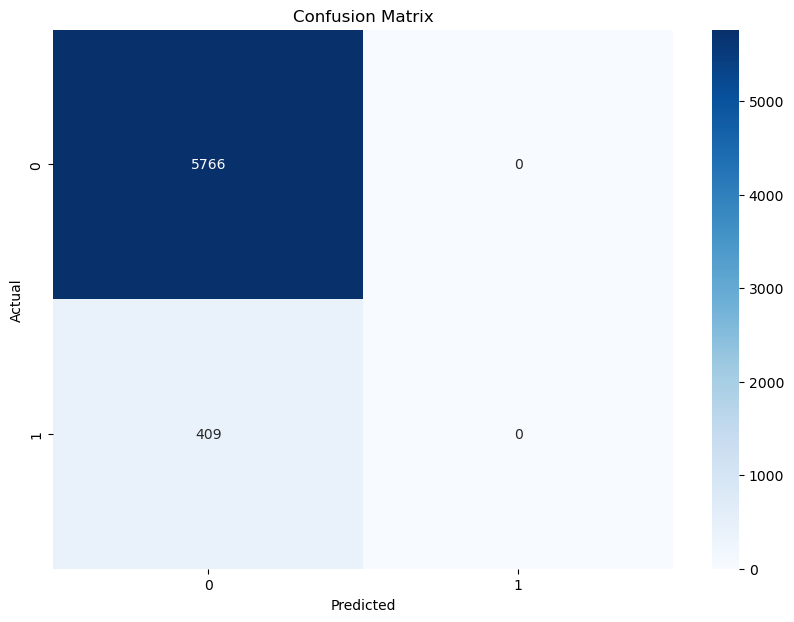

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      5766
           1       1.00      0.00      0.00       409

    accuracy                           0.93      6175
   macro avg       0.97      0.50      0.48      6175
weighted avg       0.94      0.93      0.90      6175

Balanced Accuracy: 0.5000
F1-Score: 0.0000
Precision: 0.0000
Recall: 0.0000
ROC-AUC: 0.9799


c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


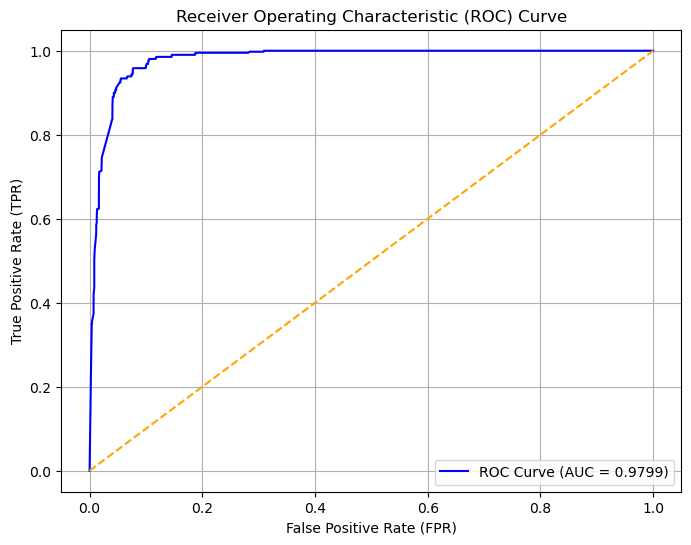

Cohen's Kappa: 0.0000
Matthews Correlation Coefficient (MCC): 0.0000


In [247]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, roc_auc_score, f1_score, precision_score, recall_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 테스트 데이터에 대한 예측 (확률이 아닌 레이블을 반환)
y_pred = loaded_model.predict(dtest).astype(int)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Precision, Recall, F1-Score 포함)
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", class_report)

# Balanced Accuracy (클래스 불균형 문제 해결을 위한 정확도)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# ROC-AUC 계산 (이진 분류에서는 다이렉트로 계산 가능)
y_pred_proba = loaded_model.predict(dtest)  # 확률 예측 (0/1 확률 중 1 클래스에 대한 확률 사용)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Cohen's Kappa 계산
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohen_kappa:.4f}")

# Matthews Correlation Coefficient (MCC) 계산
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
